****
## World Bank Project

Using data in file 'data/world_bank_projects.json'
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

****
## Preliminaries and Data Loading

We're going to load any necessary librarie and get the json file into a dataframe.

Following that, we'll get some information about whats going on in the dataframe so we can figure out what type of cleaning is necessary.

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import random as rnd
import nltk
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms
%matplotlib inline

In [2]:
# load json as string
#json.load((open('world_bank_projects.json')))

# load as Pandas dataframe
rough_df = pd.read_json('world_bank_projects.json')
rough_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [3]:
rough_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [4]:
len(rough_df['countrycode'].unique()), len(rough_df['countryshortname'].unique())

(118, 118)

In [5]:
rough_df['mjtheme_namecode'].head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [6]:
rough_df['mjtheme_namecode'].loc[1], type(rough_df['mjtheme_namecode'].loc[1][0])

([{'code': '1', 'name': 'Economic management'},
  {'code': '6', 'name': 'Social protection and risk management'}],
 dict)

In [7]:
rough_df['mjthemecode'].head()

0        8,11
1         1,6
2    5,2,11,6
3         7,7
4         5,4
Name: mjthemecode, dtype: object

In [8]:
len(rough_df['id'].unique())

500

In [9]:
type(rough_df['mjtheme_namecode'][1]),type(rough_df['mjthemecode'][1])

(list, str)

In [10]:
rough_df.describe()

,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2013.108000,4.432400e+06,3.286010e+07,3.542136e+07,1.547241e+08,6.828146e+07,7.271386e+07
std,0.722066,2.023307e+07,1.089197e+08,7.681431e+07,4.764211e+08,1.242662e+08,1.234705e+08
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,0.000000e+00,3.000000e+04
25%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.472500e+06,0.000000e+00,5.000000e+06
50%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+07,2.000000e+07,2.500000e+07
75%,2013.000000,1.695000e+06,0.000000e+00,3.700000e+07,1.021250e+08,8.625000e+07,9.045000e+07
max,2015.000000,3.650000e+08,1.307800e+09,6.000000e+08,5.170000e+09,1.307800e+09,1.307800e+09


****
## Cleaning

A number of the columns are redundant and can be removed. Meanwhile we can change some of the date-time strings to actual date-time and change many of the categorical columns into integers.

Also note that mjthemecode is a string, and not a list of integers. Which is something we will need to fix

In [11]:
def to_datetime(df, column):
    result = []
    for i in df.index:
        date = df.loc[i, column].split('T')[0]
        result.append(date)
    return pd.Series((v for v in result))

def string_to_int(df):
    result = []
    for i in df.index:
        entry_list = df.loc[i, 'mjthemecode'].split(',')
        int_list = [int(j) for j in entry_list]
        result.append(int_list)
    return pd.Series((v for v in result))

def shorten_name(df):
    result = []
    for i in df.index:
        name = df.loc[i, 'countryshortname'].split(',')[0]
        result.append(name)
    return pd.Series((v for v in result))

columns_to_keep = ['id','countrycode','mjtheme','mjtheme_namecode']
working_df = rough_df[columns_to_keep].copy()
working_df['Major_Theme_Code'] = string_to_int(rough_df)
working_df['Country_Name'] = shorten_name(rough_df)
working_df.head()

,id,countrycode,mjtheme,mjtheme_namecode,Major_Theme_Code,Country_Name
0,P129828,ET,[Human development],"[{'code': '8', 'name': 'Human development'}, {...","[8, 11]",Ethiopia
1,P144674,TN,"[Economic management, Social protection and ri...","[{'code': '1', 'name': 'Economic management'},...","[1, 6]",Tunisia
2,P145310,TV,"[Trade and integration, Public sector governan...","[{'code': '5', 'name': 'Trade and integration'...","[5, 2, 11, 6]",Tuvalu
3,P144665,RY,"[Social dev/gender/inclusion, Social dev/gende...","[{'code': '7', 'name': 'Social dev/gender/incl...","[7, 7]",Yemen
4,P144933,LS,"[Trade and integration, Financial and private ...","[{'code': '5', 'name': 'Trade and integration'...","[5, 4]",Lesotho


****
## Question 1

Find the top 10 countries with the most projects.

In [12]:
question_1 = working_df['Country_Name'].value_counts().head(10)
question_1

China         19
Indonesia     19
Vietnam       17
India         16
Yemen         13
Bangladesh    12
Morocco       12
Nepal         12
Africa        11
Mozambique    11
Name: Country_Name, dtype: int64

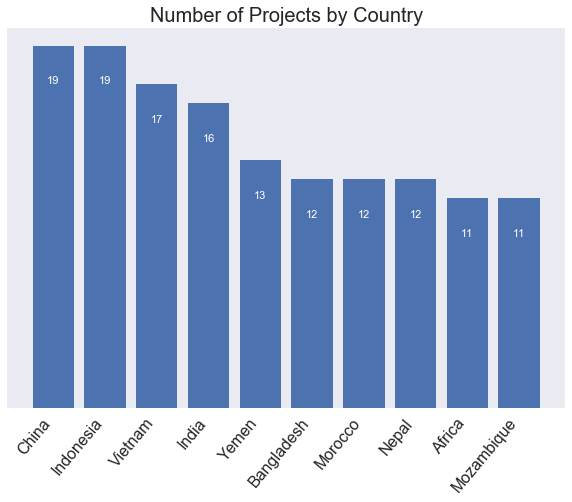

In [13]:
plt.figure(figsize=(10,7))

countries = question_1.index
pos = np.arange(len(countries))

bars = plt.bar(pos, question_1.values, linewidth=0, align='center')
plt.xticks(pos, countries, rotation=50, ha = 'right', fontsize = 16)
#plt.ylabel('Number of Projects', alpha = 0.8)
plt.title('Number of Projects by Country',fontsize = 20)
x = plt.gca().xaxis

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.grid(False)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, str(int(height)), 
                 ha='center', color='w', fontsize=11)
    
plt.show()

****
## Question 2

Find the top 10 major project themes (using column 'mjtheme_namecode')

It will be necessary for this question as well as the next to build a pandas series of all theme codes and corresponding theme names.

In [14]:
theme_list = []
for i in working_df.index:
    _ = [theme_list.append(d) for d in working_df.loc[i,'mjtheme_namecode'] if d not in theme_list]

theme_df = pd.DataFrame(theme_list)
theme_df = theme_df[theme_df['name'] != '']
theme_df['code'] = pd.to_numeric(theme_df['code'], errors='coerce')
theme_df.set_index('code', inplace=True)
theme_df.sort_index(inplace=True)
theme_df

,name
code,
1,Economic management
2,Public sector governance
3,Rule of law
4,Financial and private sector development
5,Trade and integration
6,Social protection and risk management
7,Social dev/gender/inclusion
8,Human development
9,Urban development


In [15]:
seperated_df = working_df.set_index(['id', 'Country_Name'])['Major_Theme_Code'].apply(pd.Series).stack()
seperated_df = seperated_df.reset_index()
seperated_df.columns = ['id','Country_Name','count','theme']
del seperated_df['count']
seperated_df.head()

,id,Country_Name,theme
0,P129828,Ethiopia,8.0
1,P129828,Ethiopia,11.0
2,P144674,Tunisia,1.0
3,P144674,Tunisia,6.0
4,P145310,Tuvalu,5.0


In [16]:
top_themes = seperated_df['theme'].value_counts()
merged_themes = pd.concat([theme_df, top_themes], axis=1)
merged_themes.rename(columns={'theme':'count'}, inplace=True)
merged_themes.set_index('name', inplace= True)
merged_themes.sort_values(by=['count'], ascending=False, inplace=True)

So we used merged_themes with head(10) to get our top 10 list.

In [17]:
merged_themes.head(10)

,count
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


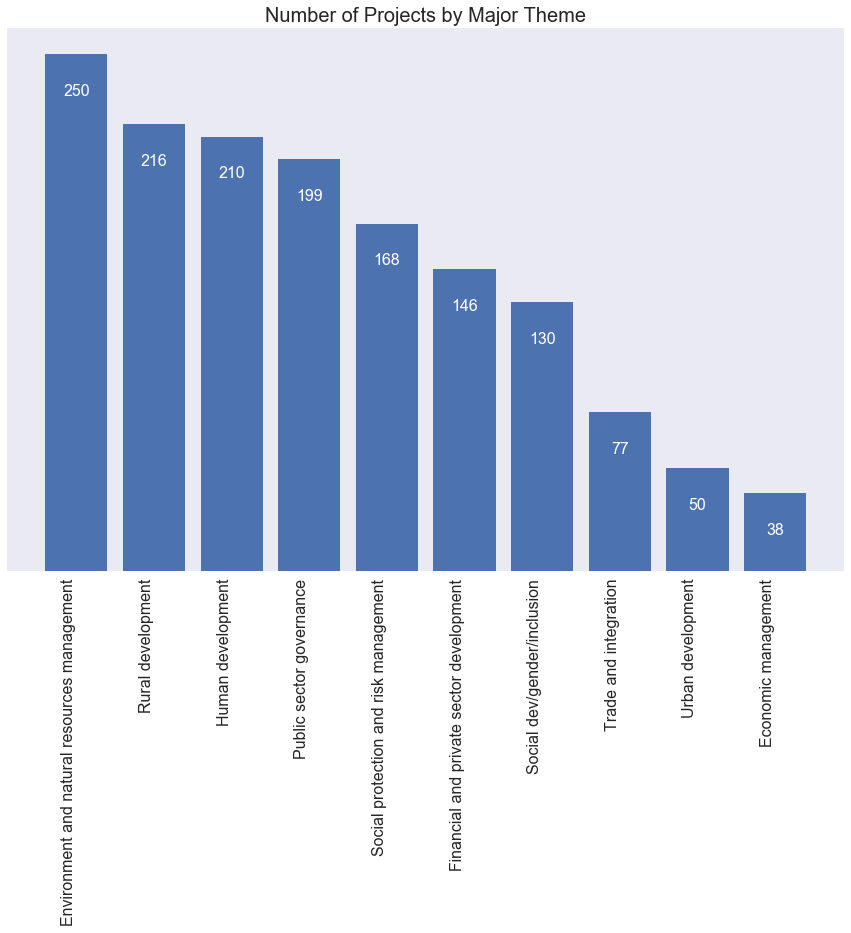

In [18]:
plt.figure(figsize=(15,10))

Themes = merged_themes.head(10).index
pos = np.arange(len(Themes))

bars = plt.bar(pos, merged_themes.head(10)['count'].values, linewidth=0, align='center')
plt.xticks(pos, Themes, rotation='vertical', ha = 'right', fontsize = 16)
#plt.ylabel('Number of Projects', alpha = 0.8)
plt.title('Number of Projects by Major Theme', fontsize = 20)
x = plt.gca().xaxis

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.grid(False)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 20, str(int(height)), 
                 ha='center', color='w', fontsize=16)
    
plt.show()

****
## Question 3

In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [19]:
def create_new_theme(df):
    result = []
    for i in df.index:
        entry_list = df.loc[i, 'Major_Theme_Code']
        dict_list = []
        for j in entry_list:
            dict_list.append({'code': str(j), 'name': theme_df.loc[j,'name']})
        result.append(dict_list)
    return pd.Series((v for v in result))

working_df['Major_Theme_Name_Code'] = create_new_theme(working_df)
question_3 = working_df[['id', 'Country_Name', 'Major_Theme_Name_Code']]

So now we have our completed major themes code column.

In [20]:
question_3.head()

,id,Country_Name,Major_Theme_Name_Code
0,P129828,Ethiopia,"[{'code': '8', 'name': 'Human development'}, {..."
1,P144674,Tunisia,"[{'code': '1', 'name': 'Economic management'},..."
2,P145310,Tuvalu,"[{'code': '5', 'name': 'Trade and integration'..."
3,P144665,Yemen,"[{'code': '7', 'name': 'Social dev/gender/incl..."
4,P144933,Lesotho,"[{'code': '5', 'name': 'Trade and integration'..."


In [26]:
question_3['Major_Theme_Name_Code'].unique

<bound method Series.unique of 0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
5      [{'code': '6', 'name': 'Social protection and ...
6      [{'code': '2', 'name': 'Public sector governan...
7      [{'code': '11', 'name': 'Environment and natur...
8      [{'code': '10', 'name': 'Rural development'}, ...
9      [{'code': '2', 'name': 'Public sector governan...
10     [{'code': '10', 'name': 'Rural development'}, ...
11     [{'code': '10', 'name': 'Rural development'}, ...
12     [{'code': '4', 'name': 'Financial and private ...
13     [{'code': '5', 'name': 'Trade and integration'...
14     [{'code': '6', 'name': 'Social protection and ...
15     [{'code': '10', 'name': 'Rural development'}, ...
16     [{'code': '10', 'name': 'Rural development'}, ...
